<a href="https://colab.research.google.com/github/AbdoIbrahim/project2/blob/main/Project_2_Part_2(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 - Part 1 (Core)
Your second project is going to have a lot more freedom than your first project. This is because we want you to have a project in your portfolio that interests you or relates to the industry you would like to work in.

Your task for this week is to propose two possible datasets you would like to work with for Project 2.  

You will choose your first choice data set, and a backup data set in case the first proposed data set is not approved.  

This data can be from any source and can be on any topic with these limitations:

* the data must be available for use (it is your responsibility to ensure that the license states that you are able to use it.)
* the data must be appropriate for a professional environment
* the data must NOT contain personal information
the data must NOT be a dataset used for any assignment, lecture, or task from the course
* the data must NOT be a time series dataset.  You will be able to identify these because each row will represent a moment in time.  These kinds of datasets follow special rules and are not appropriate for the kind of machine learning you have learned in this stack.
Make sure you select a dataset that will be reasonable to work with in the amount of time we have left. Think about what questions you could reasonably answer with the dataset you select. 

You must propose two datasets that each have a supervised learning component. You may choose a regression or classification problem for each proposed data set.  

For this task:

Create a Colab notebook where you have uploaded and shown the .head() of each of your data sets.  For each of the proposed datasets, answer the following questions:



In [13]:
import pandas as pd 
import numpy as np 

In [14]:
path = '/content/submit.csv'
fake_news_df = pd.read_csv(path)

fake_news_df.head()

FileNotFoundError: ignored

In [ ]:
fake_news_df.info()
fake_news_df.shape

First choice: dataset 1

1) Source of data
My source for this data is from Kaggle https://www.kaggle.com/competitions/fake-news/overview 
2) Brief description of data
This data uses different to features to predict whether certain content is considered Fake news or not. 

3) What is the target?
target is label 0 would be reliable news 1 would be unreliable/ fake news 
4) Is this a classification or regression problem?
This is a classification provlem 

5) How many features?
2 features for the submit csv there is a seperate train file and test file as well. 
6) How many rows of data.
5200 rows 
7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
There are a seperate Train and Test csv files I've never dealt with multiple files in my analysis before. 

Second choice: dataset 2

1) Source of data
This is a dataset found on Kaggle 
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

2) Brief description of data
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

3) What is the target?
The Target will be thee column Heart Disease since that column has a 0 for neegative and 1 for positive. 

4) Is this a classification or regression problem?
Classifcation 
5) How many features?
11 features 
6) How many rows of data.
918 rows 
7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
The challenge I see for this dataset is that it is fairly small with less than a 1000 rows. Ideally more data would be better. 
Add your colab notebook to your Github and submit the link below.

In [16]:
path = '/content/heart.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


(918, 12)

#Start of Project 2 part 2 8/11/2022
##Project 2 - Part 2 (Core)
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.  

To meet the requirements for this week you must have:

-deleted unnecessary columns

-deleted duplicate rows

-identified and addressed missing values 

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats)

-produced univariate visuals for the target and all features

-identified outliers

-clearly commented all of your cleaning steps and described any decisions you made  

Commit your file to your Github repository and submit the link below.



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#All the columns are related to predicting Heart Disease 

In [19]:
#Check for missing values 
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values 

In [20]:
#Check for null values 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no Null Values 

In [21]:
#Check for duplicates 
df.duplicated().sum()

0

There are no Duplicates that need to be removed 

#Check Value Counts of all the columns make sure there aren't any inconsistncies. 

In [22]:
#Check Age Column Value Counts 
df['Age'].value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

Values look normal for age

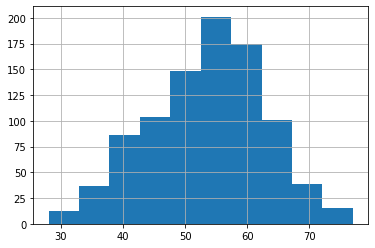

In [23]:
#Lets Explore the age range of the patients 
df['Age'].hist();

The range of patients is from 40 years old to 60 years old


In [24]:
#Check Sex Column Value Counts 

df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

The Value counts of sex look normal

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [26]:
#Check ChestPainType Column Value Counts 

df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

Values for Chest pain look normal 

In [27]:
#Check RestingBP Column Value Counts 
df['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [28]:
#Check Cholesterol Column Value counts 
df['Cholesterol'].value_counts()


0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [35]:
#Locate Columns with 0 as avalue for cholesterol
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


There are 172 rows in choloesterol column that have 0 as a value  

In [36]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

Values for Fasting BS look normal

In [37]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

Values loook normal for this column 

In [38]:
df['MaxHR'].value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

Values look within the normal range

In [39]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

Values look normal 

In [40]:
df['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

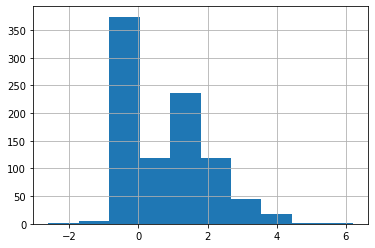

In [47]:
df['Oldpeak'].hist();

-2 is an Outlier 

Values look normal

In [41]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

Values look normal 

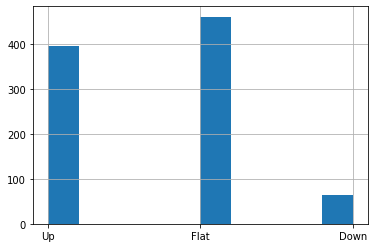

In [46]:
df['ST_Slope'].hist();

Distribution of the ST SLope 

In [42]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

Values look normal 

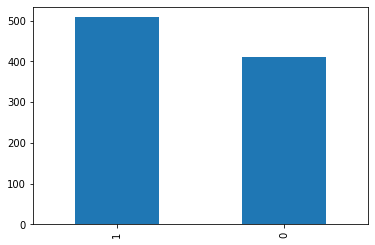

In [44]:
df['HeartDisease'].value_counts().plot(kind = 'bar')

Proprtion of those with Heart Disease.